In [1]:
import pandas as pd 
import os

In [2]:
import QAOA_Tester as qtee


In [3]:
problem_generator = qtee.ProblemGenerator()

min_items = 3
max_items = 10
min_value = 5
max_value = 63
min_weight = 1
max_weight = 20

problems = []
for i in range(min_items, max_items+1):
    # problem = problem_generator.generate_knapsack(i, (min_weight, max_weight), (min_value, max_value))
    # constraint = problem.constraint
    # with open(f'knapsack_problem_{i}_.txt', 'w') as f:
    #     f.write(f"{problem.to_dict()}")

    # problems.append(problem)
    file_name = f'knapsack_problem_{i}_.txt'
    with open(file_name, 'r') as f:
        problem_text = f.read()
    problem_description = eval(problem_text)
    problem = qtee.ProblemGenerator.from_dict(problem_description)
    problems.append(problem)

In [4]:
# problem = problems[0]
# problem.to_qaoa_ansatz(12)
# optimizer = qtee.QuantumOptimizer()
# backend = qtee.StatevectorEstimatorBackend()
# optimizer.set_backend(backend)
# optimizer.set_problem(problem)
# optimizer.set_maxiter(1000)
# # optimizer.set_tol(1e-06)
# solution = optimizer.optimize()

In [5]:
# problem.solve_qubo()

In [6]:
# print(problem.solution)
# print(solution)

In [7]:
# for problem in problems:
#     plt = problem.visualize_problem()
#     plt.savefig(f'plots/knapsack_problem_{problem.n}_.pdf')
#     plt.show()
#     plt = problem.visualize_solution()
#     plt.savefig(f'plots/knapsack_solution_{problem.n}_.pdf')
#     plt.show()
#     print(problem.solution)
#     print(problem.items)
#     print(problem.constraint)
#     print(problem.solve_qubo())

[0, 1, 1, 0]


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/qaoa/lib/python3.10/site-packages/matplotlib/pyplot.py'>

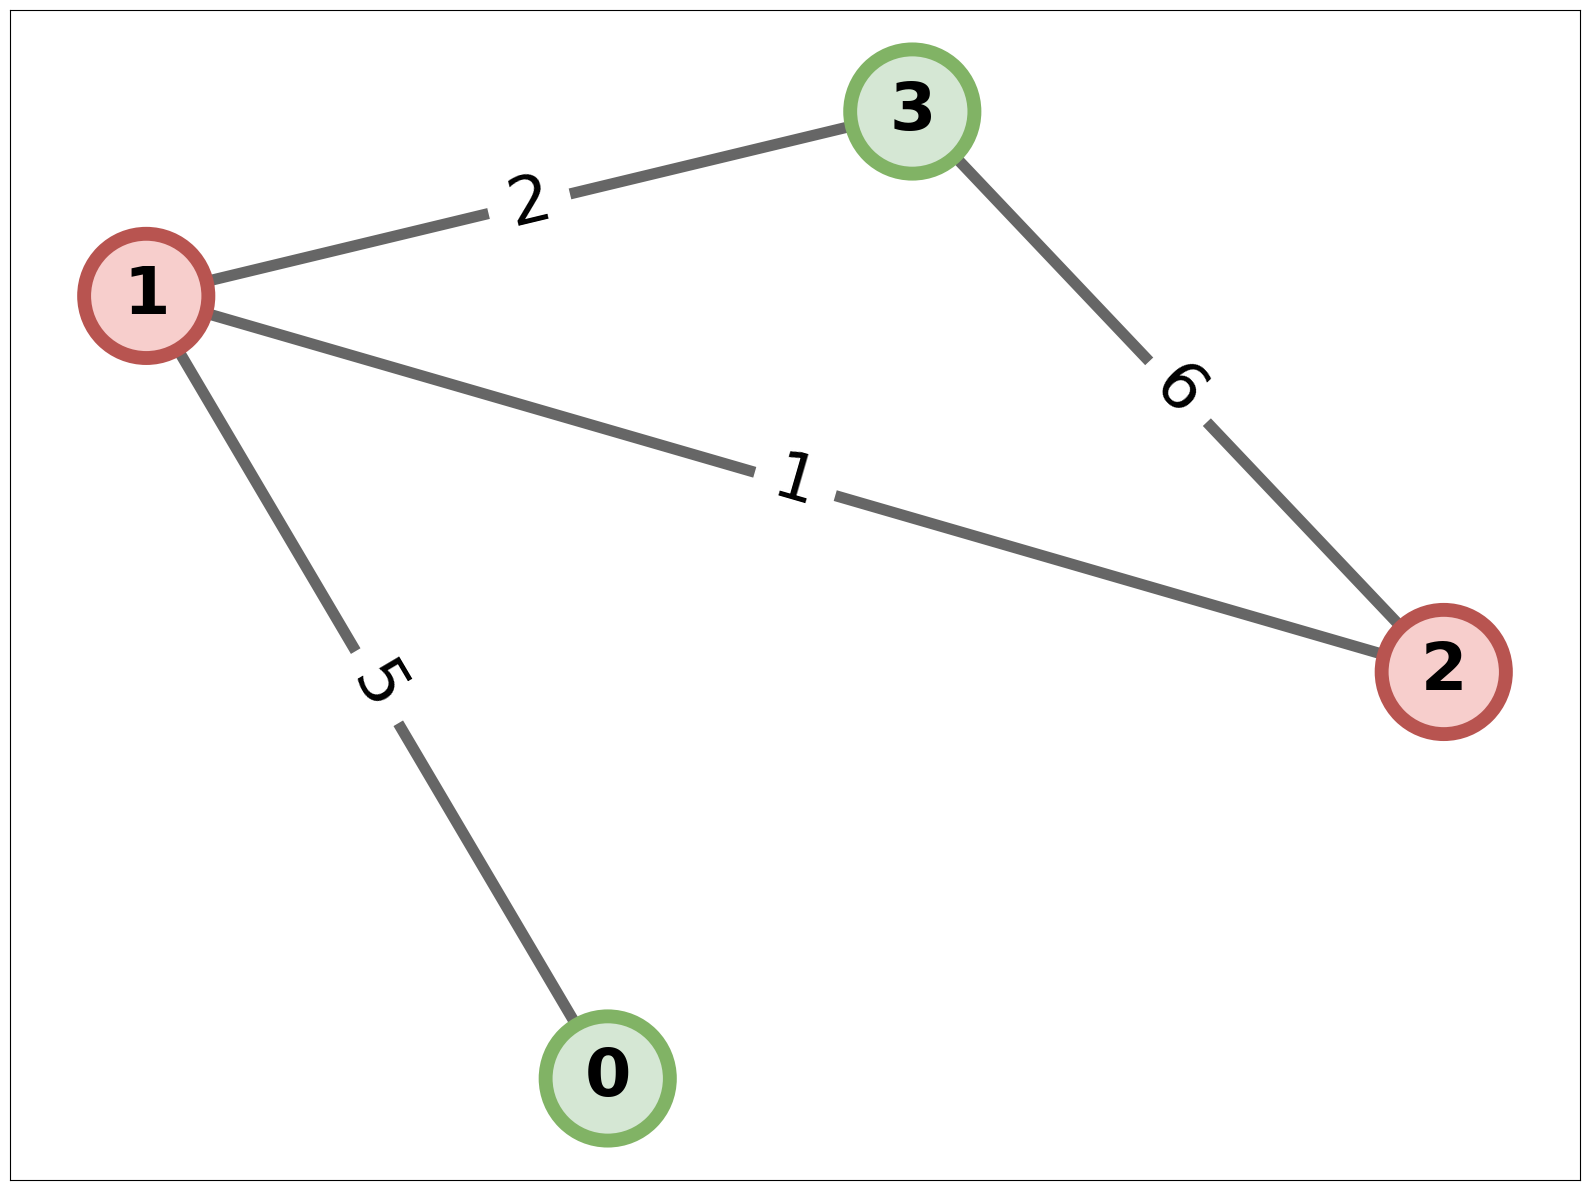

In [17]:
problem_description ={
    'type': 'maxcut',
    'graph': {'directed': False, 'multigraph': False, 'graph': {}, 'nodes': [{'id': 0}, {'id': 1}, {'id': 2}, {'id': 3}], 'links': [{'weight': 5, 'source': 0, 'target': 1}, {'weight': 1, 'source': 1, 'target': 2}, {'weight': 2, 'source': 1, 'target': 3}, {'weight': 6, 'source': 2, 'target': 3}]},
    'position': {0: [-0.2548148752963474, -0.8433541504801777], 1: [-0.947498195379204, 0.3810949273552925], 2: [0.9999999999999999, -0.20733107317232005], 3: [0.2023130706755527, 0.6695902962972065]}
}
problem = qtee.ProblemGenerator.from_dict(problem_description)
problem.visualize_solution()

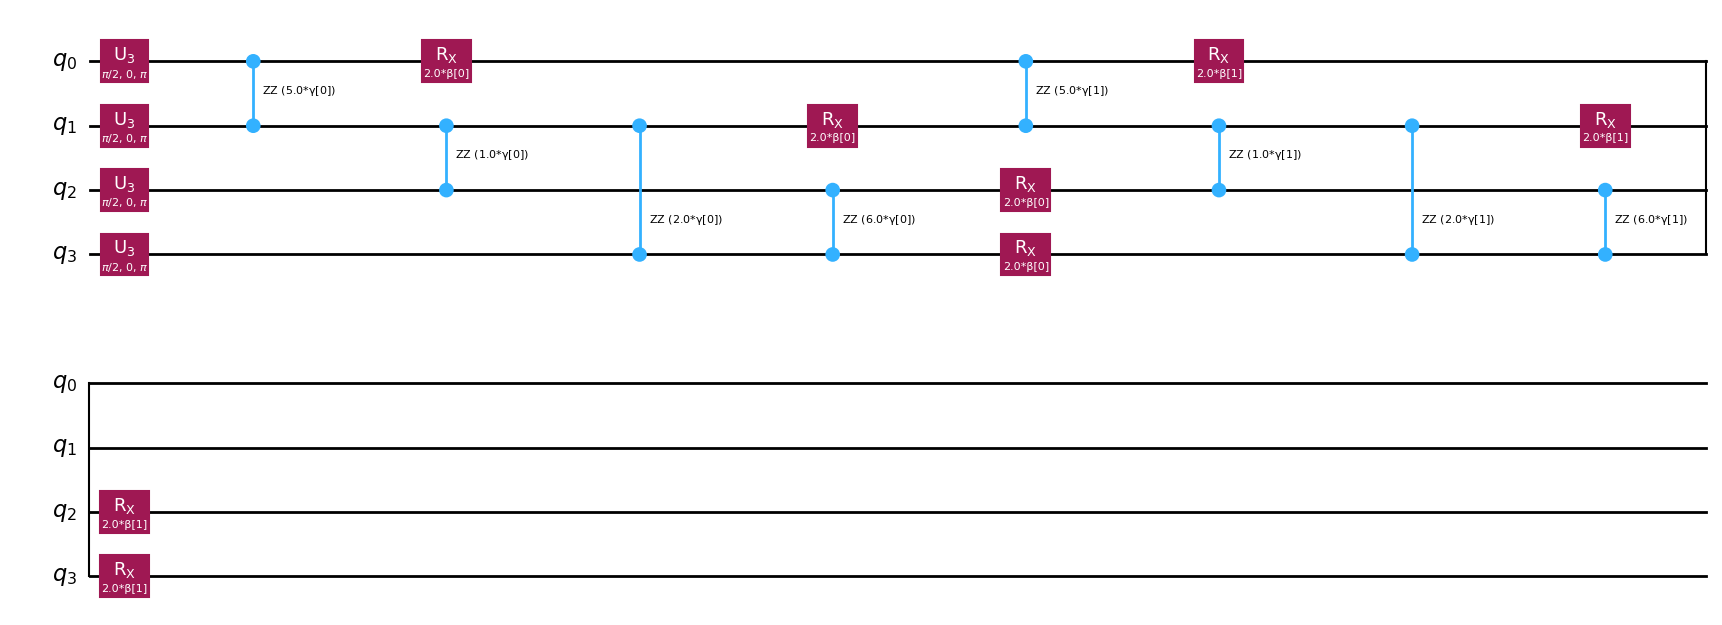

In [48]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(24, 3))  # Set the width to 12 inches and height to 6 inches

problem.to_qaoa_ansatz(2).decompose(reps=3).draw(output='mpl')
# circuit.draw(output='mpl')
# fig.savefig('qaoa_circuit.svg')


In [40]:
circuit = problem.to_qaoa_ansatz(2)
optimizer = qtee.QuantumOptimizer()
backend = qtee.StatevectorEstimatorBackend()
optimizer.set_backend(backend)
optimizer.set_problem(problem)
optimizer.set_maxiter(1000)
# optimizer.set_tol(1e-06)
solution = optimizer.optimize()

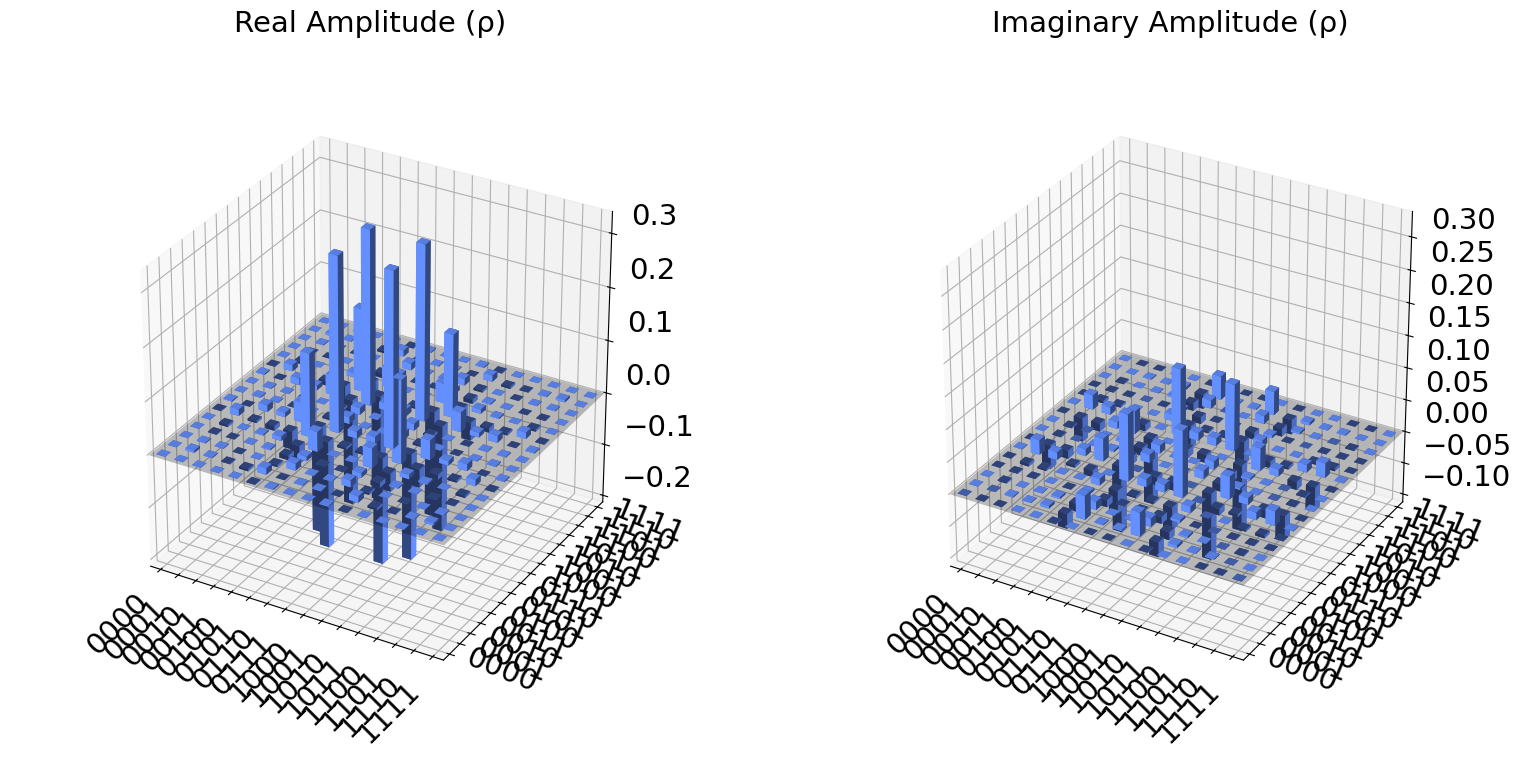

In [41]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city
parameters = optimizer.x0
circuit = circuit.assign_parameters(parameters)
state = Statevector(circuit)
plot_state_city(state)